In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import skew
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from math import sqrt
from sklearn.model_selection import train_test_split
import csv
import os


In [2]:
train=pd.read_csv(r"C:\\Users\\ajodo\Desktop\diamonds.csv")
for col in train.columns: 
    print(col) 

Unnamed: 0
carat
cut
color
clarity
depth
table
price
length in mm
width in mm
depth in mm


In [3]:
train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940,NaN,NaN,NaN,26970.5,15571.3,1,13485.8,26970.5,40455.2,53940
carat,53940,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940,NaN,NaN,NaN,61.7494,1.43262,43,61,61.8,62.5,79
table,53940,NaN,NaN,NaN,57.4572,2.23449,43,56,57,59,95
price,53940,NaN,NaN,NaN,3932.8,3989.44,326,950,2401,5324.25,18823
length in mm,53940,NaN,NaN,NaN,5.73116,1.12176,0,4.71,5.7,6.54,10.74
width in mm,53940,NaN,NaN,NaN,5.73453,1.14213,0,4.72,5.71,6.54,58.9


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    53940 non-null  int64  
 1   carat         53940 non-null  float64
 2   cut           53940 non-null  object 
 3   color         53940 non-null  object 
 4   clarity       53940 non-null  object 
 5   depth         53940 non-null  float64
 6   table         53940 non-null  float64
 7   price         53940 non-null  int64  
 8   length in mm  53940 non-null  float64
 9   width in mm   53940 non-null  float64
 10  depth in mm   53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
corr = train.corr()
corr.sort_values(["price"], ascending = False, inplace = True)#
print(corr.price)

price           1.000000
carat           0.921591
length in mm    0.884435
width in mm     0.865421
depth in mm     0.861249
table           0.127134
depth          -0.010647
Unnamed: 0     -0.306873
Name: price, dtype: float64


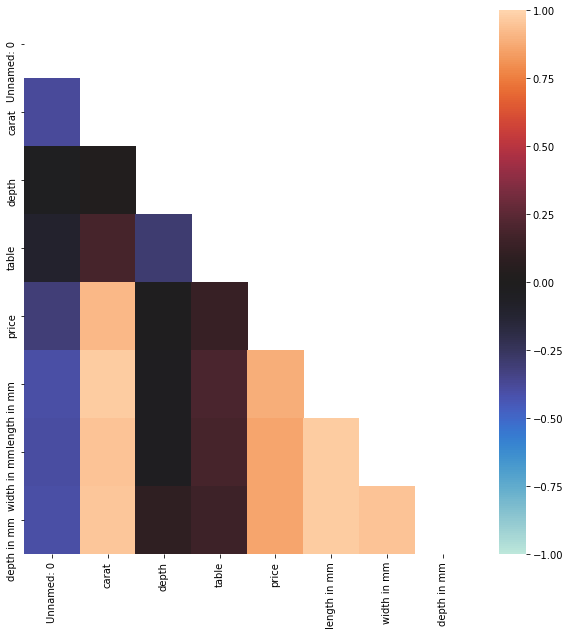

In [6]:
ax = plt.subplots(ncols=1, figsize=(10,10))
corr_matrix = train.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, vmin = -1, vmax = 1, center = 0);
plt.show()

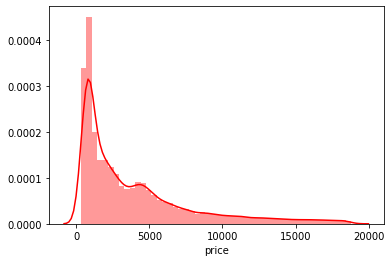

In [7]:
sns.distplot(train['price'], color="r");
plt.show()

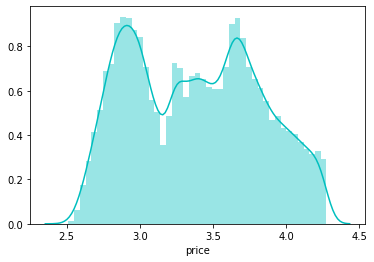

In [8]:
Log_Y = train['price']
sns.distplot(np.log10(Log_Y), color="c");
plt.show()

In [9]:
train.skew(axis = 0, skipna = True).sort_values(ascending=False)

width in mm     2.434167
price           1.618395
depth in mm     1.522423
carat           1.116646
table           0.796896
length in mm    0.378676
Unnamed: 0      0.000000
depth          -0.082294
dtype: float64

In [10]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0      26969.50
carat               0.64
depth               1.50
table               3.00
price            4374.25
length in mm        1.83
width in mm         1.82
depth in mm         1.13
dtype: float64


In [11]:
train["price"] = np.where(train["price"] <646.0, 646.0,train['price'])
train["price"] = np.where(train["price"] >9821.0, 9821.0,train['price'])
print(train['price'].skew())

0.9111029638430265


In [12]:
print(train['price'].quantile(0.10))
print(train['price'].quantile(0.90))

646.0
9821.0


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['cut'] = le.fit_transform(train['cut'])
train['color'] = le.fit_transform(train['color'])
train['clarity'] = le.fit_transform(train['clarity'])

In [19]:
train.drop('Unnamed: 0', axis=1, inplace=True) 

In [20]:
train

,carat,cut,color,clarity,depth,table,price,length in mm,width in mm,depth in mm
0,0.23,2,1,3,61.5,55.0,646.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,646.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,646.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,646.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,646.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757.0,6.15,6.12,3.74


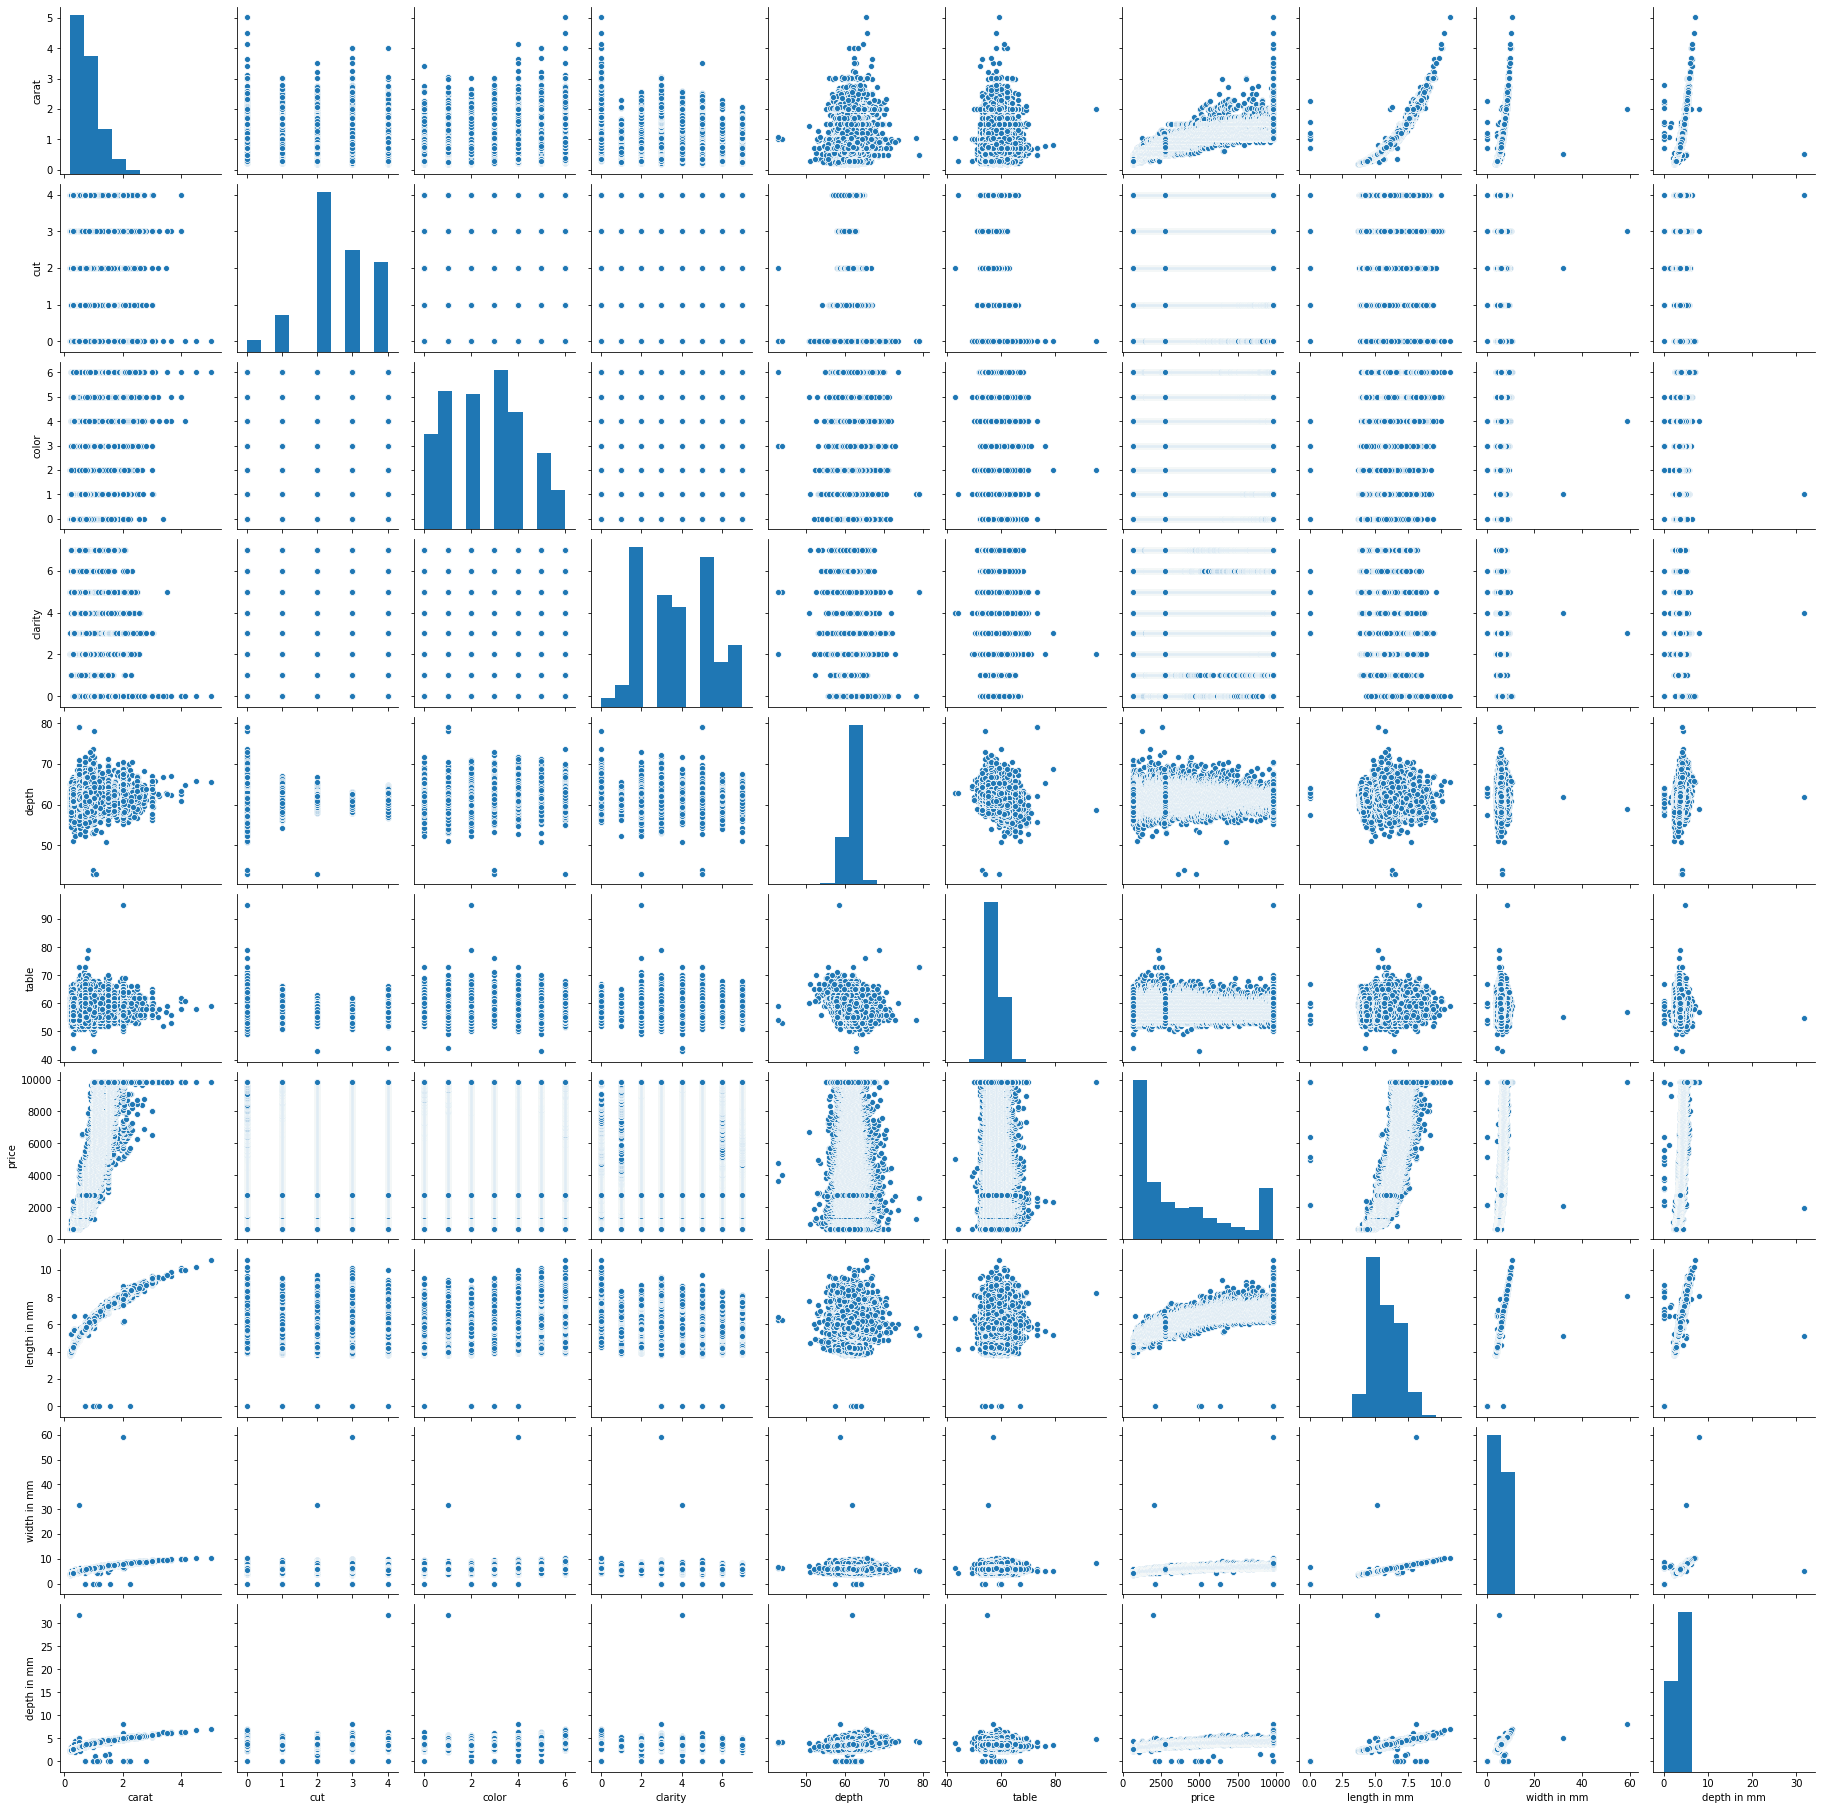

In [21]:
from seaborn import pairplot
pairplot(train)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  int32  
 2   color         53940 non-null  int32  
 3   clarity       53940 non-null  int32  
 4   depth         53940 non-null  float64
 5   table         53940 non-null  float64
 6   price         53940 non-null  float64
 7   length in mm  53940 non-null  float64
 8   width in mm   53940 non-null  float64
 9   depth in mm   53940 non-null  float64
dtypes: float64(7), int32(3)
memory usage: 3.5 MB


In [22]:
y=train["price"]
X = train.drop(["price"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((43152, 9), (43152,), (10788, 9), (10788,))

In [23]:
forest_model = RandomForestRegressor(random_state=10, n_estimators=3)

In [24]:
forest_train = forest_model.fit(X_train,y_train)

In [25]:
print(forest_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)


In [26]:
y_pred = forest_train.predict(X)

In [27]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [28]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [29]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error: 1005.4392141406903


Text(0, 0.5, 'Predictions')

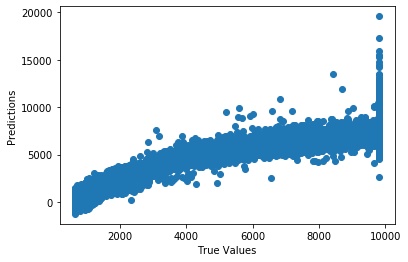

In [30]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [31]:
print("Score:", model.score(X_test, y_test))

Score: 0.8919341190253894


In [32]:
forest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [33]:
y_pred=forest_model.predict(X_test)
y_pred

array([4827.        , 7394.        , 5355.33333333, ..., 4010.66666667,
       8500.33333333, 2056.66666667])

In [34]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

381.8389665417351

In [35]:
forest_model.score(X_test, y_test)

0.984413900264048

In [36]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [37]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(X_train, y_train)
# get cross val scores
get_cv_scores(lr)

CV Mean:  0.8885485844607107
STD:  0.0015077517732068207




In [38]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.8885457521919061
STD:  0.0015112620035674725




In [39]:
from sklearn.model_selection import GridSearchCV
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score:  0.8885485817620656
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.8s finished


In [40]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(lasso)

CV Mean:  0.8886459427917481
STD:  0.001634544659318786




In [41]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score:  0.8886459427917481
Best Params:  {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.6s finished


In [42]:
# match column names to coefficients
for coef, col in enumerate(X_train.columns):
    print(f'{col}:  {lasso.coef_[coef]}')

carat:  3851.1372728971533
cut:  63.16953489671247
color:  -175.79224720672528
clarity:  232.37440273355784
depth:  -18.768647363396017
table:  -54.25333780301016
length in mm:  966.5570150879047
width in mm:  75.14461024514426
depth in mm:  73.05776789900519


In [43]:
from sklearn.linear_model import ElasticNet
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)
# get cross val scores
get_cv_scores(elastic_net)

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

CV Mean:  0.8476687105946494
STD:  0.009788305740878534


Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.8s


Best Score:  0.8886459427917481
Best Params:  {'alpha': 1, 'l1_ratio': 1}


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   36.9s finished
